In [6]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from generate_aero_state import aero_state
import wasserstein

# directs standard out here instead of to the terminal
%load_ext wurlitzer

In [7]:
n_particles = 100

radii0 = np.random.lognormal(mean=0, sigma=.3, size=n_particles)

aero0 = aero_state(n_particles, 
                  species={'species_1': {'density': 1},
                           'species_2': {'density': 1}},
                  particle_radius=radii0,
                  verbose=False)

coords0 = aero0.aero_state_mass
weights0 = radii0

radii1 = np.random.lognormal(mean=0, sigma=.3, size=n_particles)

aero1 = aero_state(n_particles, 
                  species={'species_1': {'density': 1},
                           'species_2': {'density': 1}},
                  particle_radius=radii1,
                  verbose=False)

coords1 = aero1.aero_state_mass
weights1 = radii1

In [3]:
# create an EMD object with the default parameters
emd = wasserstein.EMD()

# run EMD computation
emd_val = emd(weights0, coords0, weights1, coords1)
print('EMD value:', emd_val) 

# get flows
flows = emd.flows()
print('flows shape:', flows.shape)

# verify where extra particle got added
print('extra particle added to event', emd.extra())

EMD value: 132.07348721369627
flows shape: (100, 101)
extra particle added to event 1


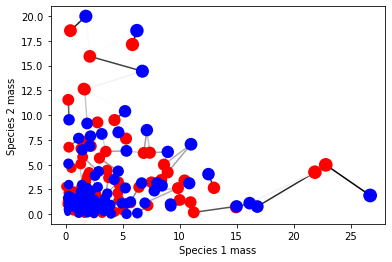

In [5]:
# plot the events
zf = 100
plt.scatter(coords0[:,0], coords0[:,1], s=zf*weights0, lw=0, color='red')
plt.scatter(coords1[:,0], coords1[:,1], s=zf*weights1, lw=0, color='blue')

# plot flows
cmap = plt.get_cmap('Greys')
fmax = flows.max()
for i in range(len(weights0)):
    for j in range(len(weights1)):
        f = flows[i,j]
        if f > 0.:
            plt.plot([coords0[i,0], coords1[j,0]], [coords0[i,1], coords1[j,1]],
                     lw=1.5, color=cmap(f/fmax), zorder=0)

#plt.xlim(0, 1)
#plt.ylim(0, 1)

plt.xlabel('Species 1 mass')
plt.ylabel('Species 2 mass')

plt.show()

In [28]:
def generate_aero_states_at_chi_interval(chi_min, chi_max, n_aerostates=10, n_particles=10):

        aero_array = []
        i_count = 0
        while len(aero_array) < n_aerostates:
                i_count += 1                        

                radii = np.random.lognormal(mean=0, sigma=.3, size=n_particles)

                aero = aero_state(n_particles, 
                                species={'species_1': {'density': 1},
                                        'species_2': {'density': 1}},
                                particle_radius=radii,
                                verbose=False)

                if (aero.mixing_state_index > chi_min) and (aero.mixing_state_index < chi_max):
                        aero_array.append(aero)
                        print(f">> Added 1 aerostate (chi={aero.mixing_state_index:3.2f}), size of aero_array: {len(aero_array)}, {i_count} total iterations")
                        
        return aero_array

>> Added 1 aerostate (chi=0.89), size of aero_array: 1, 18 total iterations
>> Added 1 aerostate (chi=0.87), size of aero_array: 2, 92 total iterations
>> Added 1 aerostate (chi=0.86), size of aero_array: 3, 191 total iterations
>> Added 1 aerostate (chi=0.86), size of aero_array: 4, 260 total iterations
>> Added 1 aerostate (chi=0.87), size of aero_array: 5, 271 total iterations
>> Added 1 aerostate (chi=0.86), size of aero_array: 6, 283 total iterations
>> Added 1 aerostate (chi=0.88), size of aero_array: 7, 343 total iterations
>> Added 1 aerostate (chi=0.89), size of aero_array: 8, 380 total iterations
>> Added 1 aerostate (chi=0.87), size of aero_array: 9, 390 total iterations
>> Added 1 aerostate (chi=0.87), size of aero_array: 10, 401 total iterations
>> Added 1 aerostate (chi=0.89), size of aero_array: 11, 418 total iterations
>> Added 1 aerostate (chi=0.86), size of aero_array: 12, 457 total iterations
>> Added 1 aerostate (chi=0.86), size of aero_array: 13, 540 total iteratio

Text(0.5, 1.0, '0.85$<\\chi<$0.9')

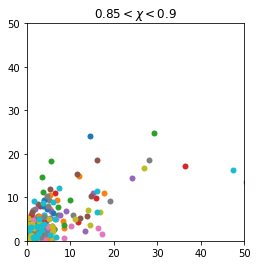

In [76]:
chi_min, chi_max = 0.85, 0.90

aero_array = generate_aero_states_at_chi_interval(chi_min, 
                                                  chi_max, 
                                                  n_aerostates=20, 
                                                  n_particles=20)

fig, ax = plt.subplots(1,1)
for aero in aero_array:
    coords = aero.aero_state_mass
    #weights = radii

    ax.scatter(coords[:,0], coords[:,1], lw=0)
    ax.set_aspect(1)

#upper_lim = max(ax.get_xlim()[1], ax.get_ylim()[1])
upper_lim = 50
lower_lim = 0
ax.set_xlim(lower_lim, upper_lim)
ax.set_ylim(lower_lim, upper_lim)
ax.set_title(f'{chi_min}$<\chi<${chi_max}')

>> Added 1 aerostate (chi=0.73), size of aero_array: 1, 1 total iterations
>> Added 1 aerostate (chi=0.74), size of aero_array: 2, 16 total iterations
>> Added 1 aerostate (chi=0.72), size of aero_array: 3, 19 total iterations
>> Added 1 aerostate (chi=0.72), size of aero_array: 4, 22 total iterations
>> Added 1 aerostate (chi=0.73), size of aero_array: 5, 30 total iterations
>> Added 1 aerostate (chi=0.73), size of aero_array: 6, 39 total iterations
>> Added 1 aerostate (chi=0.74), size of aero_array: 7, 44 total iterations
>> Added 1 aerostate (chi=0.74), size of aero_array: 8, 45 total iterations
>> Added 1 aerostate (chi=0.74), size of aero_array: 9, 53 total iterations
>> Added 1 aerostate (chi=0.71), size of aero_array: 10, 57 total iterations
>> Added 1 aerostate (chi=0.70), size of aero_array: 11, 66 total iterations
>> Added 1 aerostate (chi=0.71), size of aero_array: 12, 68 total iterations
>> Added 1 aerostate (chi=0.72), size of aero_array: 13, 77 total iterations
>> Added 

Text(0.5, 1.0, '0.7$<\\chi<$0.75')

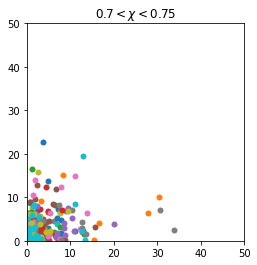

In [29]:
chi_min, chi_max = 0.7, 0.75

aero_array = generate_aero_states_at_chi_interval(chi_min, 
                                                  chi_max, 
                                                  n_aerostates=20, 
                                                  n_particles=20)

fig, ax = plt.subplots(1,1)
for aero in aero_array:
    coords = aero.aero_state_mass
    #weights = radii

    ax.scatter(coords[:,0], coords[:,1], lw=0)
    ax.set_aspect(1)

#upper_lim = max(ax.get_xlim()[1], ax.get_ylim()[1])
upper_lim = 50
lower_lim = 0
ax.set_xlim(lower_lim, upper_lim)
ax.set_ylim(lower_lim, upper_lim)
ax.set_title(f'{chi_min}$<\chi<${chi_max}')

>> Added 1 aerostate (chi=0.55), size of aero_array: 1, 23 total iterations
>> Added 1 aerostate (chi=0.56), size of aero_array: 2, 32 total iterations
>> Added 1 aerostate (chi=0.56), size of aero_array: 3, 34 total iterations
>> Added 1 aerostate (chi=0.59), size of aero_array: 4, 43 total iterations
>> Added 1 aerostate (chi=0.56), size of aero_array: 5, 45 total iterations
>> Added 1 aerostate (chi=0.59), size of aero_array: 6, 52 total iterations
>> Added 1 aerostate (chi=0.56), size of aero_array: 7, 61 total iterations
>> Added 1 aerostate (chi=0.57), size of aero_array: 8, 63 total iterations
>> Added 1 aerostate (chi=0.56), size of aero_array: 9, 68 total iterations
>> Added 1 aerostate (chi=0.59), size of aero_array: 10, 75 total iterations
>> Added 1 aerostate (chi=0.58), size of aero_array: 11, 89 total iterations
>> Added 1 aerostate (chi=0.58), size of aero_array: 12, 91 total iterations
>> Added 1 aerostate (chi=0.55), size of aero_array: 13, 100 total iterations
>> Adde

Text(0.5, 1.0, '0.55$<\\chi<$0.6')

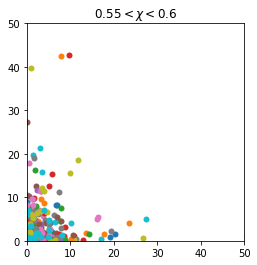

In [78]:
chi_min, chi_max = 0.55, 0.60

aero_array = generate_aero_states_at_chi_interval(chi_min, 
                                                  chi_max, 
                                                  n_aerostates=20, 
                                                  n_particles=20)

fig, ax = plt.subplots(1,1)
for aero in aero_array:
    coords = aero.aero_state_mass
    #weights = radii

    ax.scatter(coords[:,0], coords[:,1], lw=0)
    ax.set_aspect(1)

#upper_lim = max(ax.get_xlim()[1], ax.get_ylim()[1])
upper_lim = 50
lower_lim = 0
ax.set_xlim(lower_lim, upper_lim)
ax.set_ylim(lower_lim, upper_lim)
ax.set_title(f'{chi_min}$<\chi<${chi_max}')

>> Added 1 aerostate (chi=0.44), size of aero_array: 1, 162 total iterations
>> Added 1 aerostate (chi=0.41), size of aero_array: 2, 193 total iterations
>> Added 1 aerostate (chi=0.44), size of aero_array: 3, 204 total iterations
>> Added 1 aerostate (chi=0.42), size of aero_array: 4, 241 total iterations
>> Added 1 aerostate (chi=0.43), size of aero_array: 5, 247 total iterations
>> Added 1 aerostate (chi=0.44), size of aero_array: 6, 251 total iterations
>> Added 1 aerostate (chi=0.41), size of aero_array: 7, 297 total iterations
>> Added 1 aerostate (chi=0.45), size of aero_array: 8, 307 total iterations
>> Added 1 aerostate (chi=0.41), size of aero_array: 9, 401 total iterations
>> Added 1 aerostate (chi=0.45), size of aero_array: 10, 441 total iterations
>> Added 1 aerostate (chi=0.44), size of aero_array: 11, 529 total iterations
>> Added 1 aerostate (chi=0.44), size of aero_array: 12, 634 total iterations
>> Added 1 aerostate (chi=0.45), size of aero_array: 13, 642 total iterat

Text(0.5, 1.0, '0.4$<\\chi<$0.45')

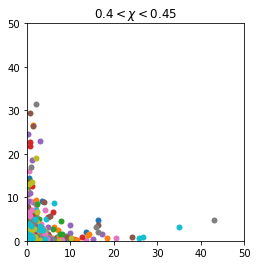

In [79]:
chi_min, chi_max = 0.4, 0.45

aero_array = generate_aero_states_at_chi_interval(chi_min, 
                                                  chi_max, 
                                                  n_aerostates=20, 
                                                  n_particles=20)

fig, ax = plt.subplots(1,1)
for aero in aero_array:
    coords = aero.aero_state_mass
    #weights = radii

    ax.scatter(coords[:,0], coords[:,1], lw=0)
    ax.set_aspect(1)

#upper_lim = max(ax.get_xlim()[1], ax.get_ylim()[1])
upper_lim = 50
lower_lim = 0
ax.set_xlim(lower_lim, upper_lim)
ax.set_ylim(lower_lim, upper_lim)
ax.set_title(f'{chi_min}$<\chi<${chi_max}')

>> Added 1 aerostate (chi=0.26), size of aero_array: 1, 72 total iterations
>> Added 1 aerostate (chi=0.29), size of aero_array: 2, 5552 total iterations
>> Added 1 aerostate (chi=0.25), size of aero_array: 3, 10987 total iterations
>> Added 1 aerostate (chi=0.29), size of aero_array: 4, 11610 total iterations
>> Added 1 aerostate (chi=0.28), size of aero_array: 5, 23389 total iterations
>> Added 1 aerostate (chi=0.29), size of aero_array: 6, 26779 total iterations
>> Added 1 aerostate (chi=0.26), size of aero_array: 7, 51996 total iterations
>> Added 1 aerostate (chi=0.27), size of aero_array: 8, 65862 total iterations
>> Added 1 aerostate (chi=0.26), size of aero_array: 9, 95411 total iterations
>> Added 1 aerostate (chi=0.29), size of aero_array: 10, 108232 total iterations
>> Added 1 aerostate (chi=0.30), size of aero_array: 11, 126374 total iterations
>> Added 1 aerostate (chi=0.27), size of aero_array: 12, 145646 total iterations
>> Added 1 aerostate (chi=0.27), size of aero_arra

Text(0.5, 1.0, '0.25$<\\chi<$0.3')

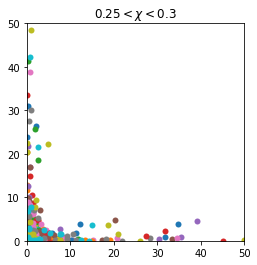

In [80]:
chi_min, chi_max = 0.25, 0.30

aero_array = generate_aero_states_at_chi_interval(chi_min, 
                                                  chi_max, 
                                                  n_aerostates=20, 
                                                  n_particles=20)

fig, ax = plt.subplots(1,1)
for aero in aero_array:
    coords = aero.aero_state_mass
    #weights = radii

    ax.scatter(coords[:,0], coords[:,1], lw=0)
    ax.set_aspect(1)

#upper_lim = max(ax.get_xlim()[1], ax.get_ylim()[1])
upper_lim = 50
lower_lim = 0
ax.set_xlim(lower_lim, upper_lim)
ax.set_ylim(lower_lim, upper_lim)
ax.set_title(f'{chi_min}$<\chi<${chi_max}')

In [49]:
def generate_emd_array(aero_array):
    emd_array = []
    for combo in combinations(aero_array, 2):  # 2 for pairs, 3 for triplets, etc
        aero0, aero1 = combo

        coords0 = aero0.aero_state_mass
        weights0 = aero0.particle_radius

        coords1 = aero1.aero_state_mass
        weights1 = aero1.particle_radius

        # create an EMD object with the default parameters
        emd = wasserstein.EMD()

        # run EMD computation
        emd_val = emd(weights0, coords0, weights1, coords1)
        #print('EMD value:', emd_val) 
        emd_array.append(emd_val)

        # get flows
        #flows = emd.flows()
        #print('flows shape:', flows.shape)

        # verify where extra particle got added
        ##print('extra particle added to event', emd.extra())
    emd_array = np.array(emd_array)

    return emd_array

def emd_prob_dist(emd_array):

    plt.hist(emd_array, bins=20, histtype='step', density=True)
    plt.yscale('log')

    plt.xlabel('EMD')
    plt.ylabel('Probability Density')


In [109]:
chi_min, chi_max = np.arange(.25, .95, .1, dtype=float), np.arange(.3, .9, .1, dtype=float)

emd_arrays = []
for mn, mx in zip(chi_min, chi_max):
    print(f'~~~ Chi range: {mn} - {mx} ~~~')
    aero_array = generate_aero_states_at_chi_interval(mn, mx, 
                                                      n_aerostates=50, 
                                                      n_particles=20)
                                                  
    emd_array = generate_emd_array(aero_array)
    emd_arrays.append(emd_array)
    print('\n')

~~~ Chi range: 0.25 - 0.3 ~~~
>> Added 1 aerostate (chi=0.30), size of aero_array: 1, 4353 total iterations
>> Added 1 aerostate (chi=0.30), size of aero_array: 2, 5536 total iterations
>> Added 1 aerostate (chi=0.30), size of aero_array: 3, 23910 total iterations
>> Added 1 aerostate (chi=0.27), size of aero_array: 4, 23981 total iterations
>> Added 1 aerostate (chi=0.30), size of aero_array: 5, 34832 total iterations
>> Added 1 aerostate (chi=0.27), size of aero_array: 6, 46507 total iterations
>> Added 1 aerostate (chi=0.29), size of aero_array: 7, 87293 total iterations
>> Added 1 aerostate (chi=0.29), size of aero_array: 8, 121090 total iterations
>> Added 1 aerostate (chi=0.28), size of aero_array: 9, 157334 total iterations
>> Added 1 aerostate (chi=0.30), size of aero_array: 10, 172637 total iterations
>> Added 1 aerostate (chi=0.29), size of aero_array: 11, 173182 total iterations
>> Added 1 aerostate (chi=0.30), size of aero_array: 12, 179108 total iterations
>> Added 1 aeros

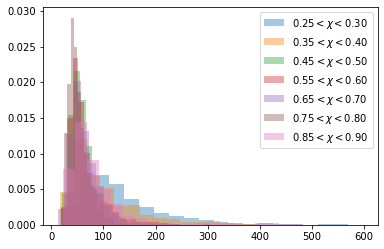

In [127]:
fig, ax = plt.subplots(1,1)
for mn, mx, array in zip(chi_min, chi_max, emd_arrays):
    ax.hist(array, bins=20, alpha=.4, #histtype='step', 
            #linewidth=1, edgecolor='k',
     density=True, label=f'{mn:3.2f}$<\chi<${mx:3.2f}')
plt.legend()

0.3 135.4617712715736
0.4 100.30606532586245
0.5 62.506433799481826
0.6000000000000001 64.43239146422108
0.7000000000000002 62.68551802985997
0.8000000000000003 51.532860200885736
0.9000000000000001 86.07150228019685


Text(0.5, 0, 'Wasserstein Distance')

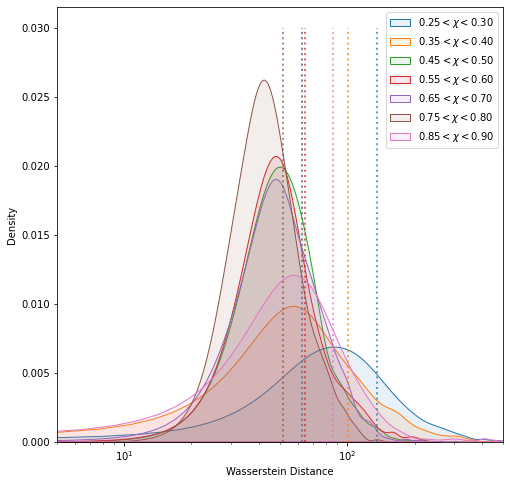

In [168]:
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize=(8,8))
for mn, mx, array in zip(chi_min, chi_max, emd_arrays):
    color = next(ax._get_lines.prop_cycler)['color']
    kde = sns.kdeplot(ax=ax, data=array, cut=2, 
            fill=True, alpha=.1, label=f'{mn:3.2f}$<\chi<${mx:3.2f}', color=color)

    mean = array.mean()
    
    kde.vlines(mean, 0, 0.03, ls=':', lw=2, color=color, alpha=.7)
    print(mx, mean)

plt.legend()
plt.xlim(5,500)
plt.xscale('log')
plt.xlabel('Wasserstein Distance')

